# Telephone operators and their subscribers 
    author: Oleg Naidovich

**TO DO LIST**

Total for the task from you is expected:

1. 5 different visualizations on Matplotlib that not only show various dependencies, but from which certain conclusions can be drawn.

2. 5 different visualizations on Seaborn that not only show various dependencies, but from which certain conclusions can be drawn.

3. Visualization conclusions are required!

4. 5 different visualizations on Plotly that not only show various dependencies, but from which certain conclusions can be drawn.

Definitely drawing any plots is it good task. But the way I see it, it is better to make some Exploratory Data Analysis on every drawn charts.


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I will not rewrite them into this kernel as our task is just to draw plots


My strategy is really simple. As far as I know, for better understanding the problem and in order to make a "good" EDA, you need to follow the next 2 points:

1. <b>Univariable analysis</b>. We'll just focus on the dependent variable and try to know a little bit more about it.
2. <b>Multivariate analysis</b>. We'll try to understand how the dependent variable and independent variables relate.

I will work only with train data since working with a real business problem we will not have test datasets.

In [4]:
# import all needable libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("train.csv", sep=";", index_col="USER_ID")

In [19]:
df.describe()

,TP_CHANGES_NUM,OBLIG_NUM,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16,ACTIVITY_DEC_16
count,29208.000000,5061.000000,2.615500e+04,2.615500e+04,26842.000000,26842.000000,26842.000000,26842.000000,2.853000e+04,2.853000e+04,29208.000000
mean,0.220590,1.016598,6.620111e+04,6.829325e+04,1563.411709,1659.444453,1392.883094,1451.735936,1.484167e+04,1.412569e+04,0.692858
std,0.733727,0.129308,1.056678e+05,1.271965e+05,7557.356615,7760.582005,4490.800790,4632.314967,5.538099e+04,4.936772e+04,0.461317
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,1.000000,3.000000e+04,3.000000e+04,28.675000,30.333333,0.000000,0.000000,1.360000e+01,1.172247e+01,1.000000
75%,0.000000,1.000000,1.000000e+05,1.000000e+05,197.895833,198.683333,1002.000000,1027.000000,3.034800e+04,2.983000e+04,1.000000
max,36.000000,3.000000,3.860000e+06,7.000000e+06,45992.000000,45992.000000,85339.000000,81504.000000,2.678416e+06,2.781535e+06,1.000000


In [20]:
df.columns

Index(['ACT_DATE', 'STATUS', 'TP_CURRENT', 'TP_CHANGES_NUM', 'START_PACK',
       'OFFER_GROUP', 'BIRTHDAY', 'GENDER', 'MLLS_STATE', 'PORTED_IN',
       'PORTED_OUT', 'OBLIG_NUM', 'OBLIG_ON_START', 'ASSET_TYPE_LAST',
       'DEVICE_TYPE_BUS', 'USAGE_AREA', 'REFILL_OCT_16', 'REFILL_NOV_16',
       'OUTGOING_OCT_16', 'OUTGOING_NOV_16', 'GPRS_OCT_16', 'GPRS_NOV_16',
       'REVENUE_OCT_16', 'REVENUE_NOV_16', 'ACTIVITY_DEC_16'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 6925431 to 22174783
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACT_DATE         29208 non-null  object 
 1   STATUS           29208 non-null  object 
 2   TP_CURRENT       29208 non-null  object 
 3   TP_CHANGES_NUM   29208 non-null  float64
 4   START_PACK       23796 non-null  object 
 5   OFFER_GROUP      23796 non-null  object 
 6   BIRTHDAY         25278 non-null  object 
 7   GENDER           28600 non-null  object 
 8   MLLS_STATE       4789 non-null   object 
 9   PORTED_IN        29208 non-null  bool   
 10  PORTED_OUT       29208 non-null  bool   
 11  OBLIG_NUM        5061 non-null   float64
 12  OBLIG_ON_START   29208 non-null  bool   
 13  ASSET_TYPE_LAST  9281 non-null   object 
 14  DEVICE_TYPE_BUS  29208 non-null  object 
 15  USAGE_AREA       23067 non-null  object 
 16  REFILL_OCT_16    26155 non-null  float64
 17  REF

In [22]:
# I want to divide numerical and categorical features in order to make some magical visualisation
continious_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes(np.object).columns

Okay, I'll let myself draw some scary graphs. Please don't judge me for this. I do this only in order to better understand the picture of data with which I work.

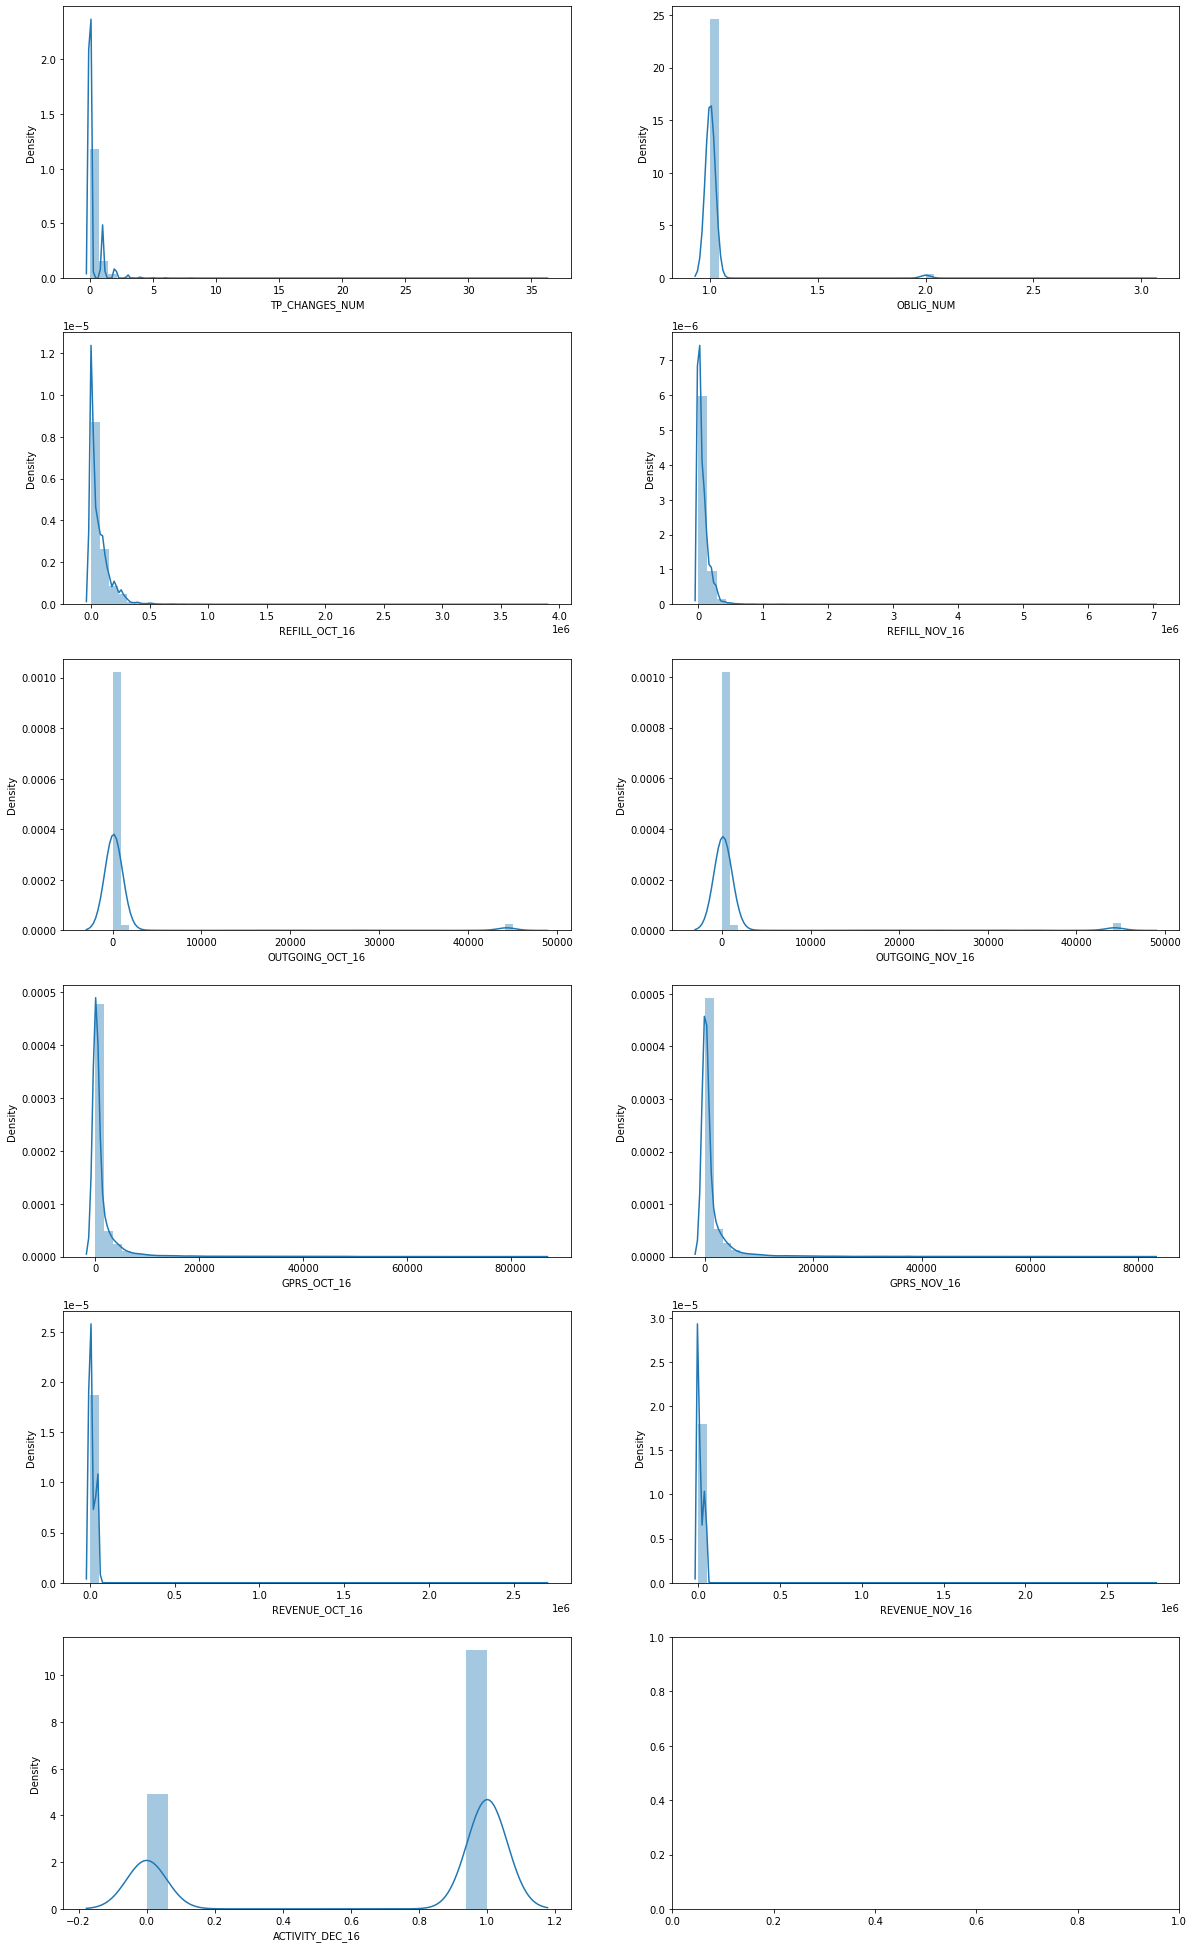

In [23]:
fig, axs = plt.subplots(6, 2, figsize=(20,35))

for key, val in enumerate(continious_features):
    sns.distplot(a=df[val], hist=True, kde=True, ax=axs[key // 2][key % 2])

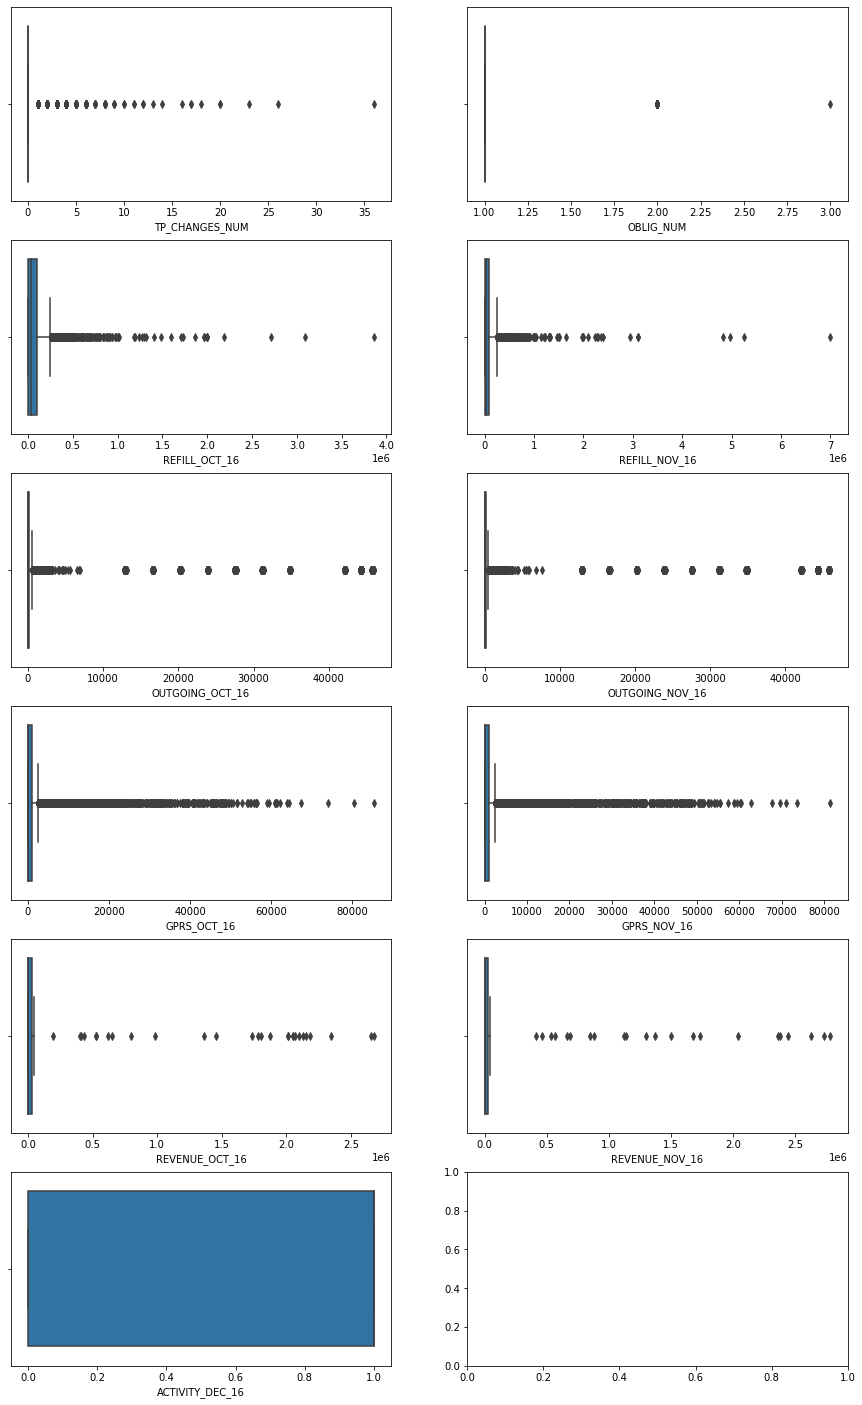

In [24]:
fig, axs = plt.subplots(6, 2, figsize=(15,25))

for key, val in enumerate(continious_features):
    sns.boxplot(x=df[val], ax=axs[key // 2][key % 2])


In [25]:
fig, axs = plt.subplots(6, 2, figsize=(20, 40))

for key, features in enumerate(categorical_features):
    value_counts = df[features].value_counts()
    x_pos = np.arange(0, len(value_counts))

    axs[key // 2, key % 2].bar(x_pos, value_counts.values, tick_label=value_counts.index)
    axs[key // 2, key % 2].set_title(features)

    for tick in axs[key // 2, key % 2].get_xticklabels():
        tick.set_rotation(90)

plt.show()

KeyboardInterrupt: 



Well now the pictures are much clearer. So now I can draw meaninful plots. Let's start!

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
plt.title('The type of subscriber’s connection')
values = list(df["START_PACK"].value_counts().values) 
labels = list(df["START_PACK"].value_counts().index)
# Create a pieplot
plt.pie(values, labels=labels, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.2f%%');
plt.show();

**Pieplot**

From this plot we can mention that Commercial connection is much more popular belong users.

In [ ]:
# values = list(df["USAGE_AREA"].value_counts().values) 
labels = list(df["USAGE_AREA"].value_counts().index)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('The type of subscriber’s connection')
# plot it
squarify.plot(sizes=values, label=labels, alpha=.7,  )
plt.axis('off')
plt.show()

**Treemap**

It is not so clear plot for understanding, but we can mention that Minsk and local towns are half of the total users. Maybe we can devide our data into 2 main groups: Towns and others (villages).

In [ ]:
f, ax  = plt.subplots(1, 2, figsize=(25, 10))
matrix = np.triu(df[continious_features].corr())
ax[0].set_title('kendall')
ax[1].set_title('pearson')

sns.heatmap(df[continious_features].corr(method='kendall'), ax = ax[0],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=matrix, cbar=False, )

sns.heatmap(df[continious_features].corr(), vmin=-1, ax=ax[1],
            vmax=1, cmap='coolwarm', annot=True, mask=matrix )
plt.show()

**Heatmap**: There are a strong correlation between:

* REVENUE_OCT_16 and REFILL_OCT_16

* REVENUE_NOV_16 and REFILL_NOV_16

It is obvious that this features correleted since people just replenish (пополняют) the account as much as the company debited from the subscriber's balance.

Let's find some outlier from this fact!

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

x = df['REFILL_OCT_16'].values
y = df['REVENUE_OCT_16'].values
ax.scatter(x, y, s=10)

x = df['REFILL_NOV_16'].values
y = df['REVENUE_NOV_16'].values
ax.scatter(x, y, s=10)

ax.set_title('Colleration REFILL and REVENUE')
ax.set_xlabel('REFILL')
ax.set_ylabel('REVENUE')
ax.legend(('October', 'November'), loc='lower right', shadow=True)

**Scatter**

As we can see, there is a linear relationship between REFILL and REVENUE features. Moreover, there are some outliers in october and november. Doing Multivariate analysis we can mention this fact, but with Univariable analysis we cannot.

In the future, if we want to leant model (special for linear models), we have to deal with these outliers.

We can also fill the gaps (REFILL or REVENUE) due to these correlation and linear relationship.

In [ ]:
values = list(df["STATUS"].value_counts().values) 
labels = list(df["STATUS"].value_counts().index)

fig, ax = plt.subplots()

y_pos = np.arange(len(labels))
performance = 3 + 10 * np.random.rand(len(labels))

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Amount')
ax.set_ylabel('Status')

ax.set_title('Code of the current status of the subscriber')

plt.show()

**Barh**

From this plot we can mention that the number of D-status abonents in the majority. May be it is better to use binary transformation like: 1 is D, 0 is others. It will be useful for many algorithms when we will teach them.

In [ ]:
# create data
names = ['Active', 'Inactive']
size = df["ACTIVITY_DEC_16"].value_counts().values

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.4, color='white')
plt.title('Active and inactive users in December')
plt.pie(size, labels=names, radius=1.2, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Donut**

We do not have a description of this data in txt file. Nevertheless we can say that the number of active users in December is much more than negative.

In [ ]:
df['PORTED_IN'].value_counts()

In [ ]:
df['PORTED_OUT'].value_counts()

In [ ]:
df['OBLIG_NUM'].value_counts()

In [ ]:
df['OBLIG_ON_START'].value_counts()

In [ ]:
df['USAGE_AREA'].value_counts()

In [ ]:
df['MLLS_STATE'].value_counts()

In [ ]:
date = df["BIRTHDAY"].astype("datetime64")
plt.xlabel('Birthday:')
plt.ylabel('Amount of abonents:')
plt.hist(date, bins=150)
plt.show()

**Histogram**

From this plot we can conclude that most of the abonents were born on the interval (1980-2000). Let's draw boxplots in order to see median, Q1 and Q3.

In [ ]:
data = df["BIRTHDAY"].astype("datetime64").dropna()
data=pd.DatetimeIndex(data).year
sns.boxplot(y=data)

So it is much easier to see some outliers! We can delete it or just dont pay attantion.

In [ ]:
data = df["BIRTHDAY"].astype("datetime64")
df["Birth_year"] = pd.DatetimeIndex(data).year

In [ ]:
sns.violinplot(y=df["Birth_year"])

**Box plots and violin**

There were boxplots. Now let's see the correlation between OUTGOING_OCT_16 == GPRS_OCT_16 and OUTGOING_NOV_16 == GPRS_NOV_16 

In [ ]:
sns.jointplot(x=df['OUTGOING_OCT_16'], y=df['GPRS_OCT_16'], kind="kde")

**jointplot**

The lion part of our data lies in the small space

In [ ]:
sns.regplot(x=df['OUTGOING_OCT_16'], y=df['GPRS_OCT_16'],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()

In [ ]:
sns.jointplot(x=df['OUTGOING_OCT_16'],
              y=df['GPRS_OCT_16'], ax=ax, hue=df["GENDER"])
plt.gcf().set_size_inches(12, 12)

**regplot and jointplot**

As it was expected, there is no correlation between OUTGOING_OCT_16 and GPRS_OCT_16 features. Moreover, there is no patterns between genderand this two features. Let's consider this fact with OUTGOING_NOV_16 and GPRS_NOV_16 params.

In [ ]:
sns.regplot(x=df['OUTGOING_NOV_16'], y=df['GPRS_NOV_16'],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()

In [ ]:
sns.jointplot(x=df['OUTGOING_NOV_16'],
              y=df['GPRS_NOV_16'], ax=ax, hue=df["GENDER"])
plt.gcf().set_size_inches(12, 12)

**regplot and jointplot**

Same all. There is no correlation between OUTGOING_NOV_16 and GPRS_NOV_16 features. Moreover, there is no patterns between genderand this two features.

Let's draw `pairplot`

In [ ]:
temp = df.drop(labels=["ACTIVITY_DEC_16", "OBLIG_ON_START", "OBLIG_NUM",
               "PORTED_IN", "REFILL_NOV_16", "REFILL_OCT_16", "PORTED_OUT"], axis=1)

In [ ]:
sns.pairplot(temp)
plt.show()

**pairplot**

Definitely this graphs can tell us a lot about correlacon of different features. There are some linear correlation between GPRS_OCT_16 and GPRS_NOV_16.

## plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
temp = df.dropna(subset=["USAGE_AREA"])
fig = px.scatter(temp, x="Birth_year", y="GPRS_OCT_16",
                 color="USAGE_AREA")
fig.show()

**scatter**

This plot describe the dependence of date of birth and Internet use among users based on Usage_Area. We can see that on the interval (1980, 2000) there are more users than in the other times.

In [ ]:
# temp = df.dropna(subset=["USAGE_AREA"])
fig = px.scatter(temp , x="Birth_year", y="GPRS_NOV_16", color="USAGE_AREA", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()


In [ ]:
values = df['USAGE_AREA'].value_counts()
index = df['USAGE_AREA'].value_counts().index
fig = px.line_polar(r=values ,theta=index, line_close=True,  title="Amount of users in different places")
fig.update_traces(fill='toself')
fig.show()

**line_polar**


From this plot we can consider that Minsk, Local Towms and Mix places are the places whene people spends most of his time on the network.

In [ ]:
features = ["OUTGOING_OCT_16", "OUTGOING_NOV_16",
            "GPRS_OCT_16", "GPRS_NOV_16"]
temp = df.dropna(subset=["GENDER"])
fig = px.scatter_matrix(temp, dimensions=features, color="GENDER",width=1000, height=800)
fig.update_traces(diagonal_visible=False)
fig.show()

**scatter_matrix**

Thanks to this graph, we can immediately determine the dependence between the variables.

**Conclusion**

There is very little time left until the deadline, so I want to summarize my work. Thanks to many ways of drawing plots, you can show the correlation between certain variables, which we did. Through visual analysis, outliers and abnormal data can be identified easily. Due to strong correlation of variables, it is possible to fill in missing values. However, we should be careful with strong correlations (multicollinearity) as they can lead to overfitting of the models.

It it better to  show the dependencies or independencies of how strongly depends the use of the Internet and the date of birth of the user.

In [270]:
# temp = df.dropna(subset=["GENDER"])
# fig = px.scatter_ternary(temp, a="OUTGOING_OCT_16", b="REVENUE_OCT_16", c="GPRS_OCT_16",
#     color="GENDER", size_max=15)
# fig.show()


In [ ]:
# temp = df["Birth_year"].value_counts()
# fig = px.line(temp)
# fig.show()